# Introducción a Scikit-Learn

Hay varias bibliotecas de Python que proveen implementaciones sólidas de una variedad de algoritmos de _machine learning_. (Nota: hablaremos de _machine learning_ a pesar de que una traducción adecuada es _aprendizaje automático_).
Una de las más conocidas es [Scikit-Learn](http://scikit-learn.org), un _paquete_ que provee implementaciones eficientes de un gran número de algoritmos de uso común. 
Scikit-Learn se caracteriza por tener una API (_Application Programming Interface_, Interfaz de Programación de Aplicaciones) limpia, uniforme y directa, así como una documentación útil y completa en línea.
Un beneficio de su uniformidad es que, una vez que entiendes el uso básico y la sintaxis de Scikit-Learn para un tipo de modelo, cambiarse a un modelo o algoritmo nuevo es simple y directo.

Este notebook provee una vista global de la API de Scikit-Learn. Entender la API será la base sobre la cual se construirán los siguientes notebooks, que profundizarán en algoritmos de machine learning específicos.


Partiremos cubriendo _representación de datos_, la API de _estimación_, y finalmente probaremos un ejemplo de exploración de imágenes sobre dígitos escritos a mano.

## Representation de Datos en Scikit-Learn

El propósito de Machine Learning es crear modelos a partir de los datos. Por esa razón, comenzaremos discutiendo cómo los datos se representan de modo que sean entendidos por las máquinas. La mejor analogía sobre cómo representan los datos dentro de Scikit-Learn son las tablas.

### Datos como tablas

Una tabla básica es una grilla en dos dimensiones de datos, en los que cada fila representa elementos individuales del _dataset_, y las columnas representan distintas qualidades relacionadas a esos elementos.

Un dataset de ejemplo son las [Flores de Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), que fue analizado por Ronald Fisher en 1936.

Este dataset viene incluido en algunas bibliotecas, que permiten cargarlo como un `DataFrame` de Pandas. En este caso, podemos hacerlo con la biblioteca de visualización estadística [seaborn](http://seaborn.pydata.org/):

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Cada fila del `DataFrame` es una observación, en este caso, una flor. El número de filas es el total de flores en el dataset. En general,
nos referiremos a las filas de la matriz como _samples_ (muestras), y al total de filas como `n_samples`.

Del mismo modo, cada columna de la matriz se refiere a una pieza de información que describe la observación, que puede ser cuantitativa (por ej., `sepal_length`) o cualitativa (por ej., `species`). En general, nos referiremos a las
columnas de la matriz como _features_ (características), y al número de columnas como `n_features`.

#### Matriz de Características

La organización de datos en una tabla muestra que la información puede ser vista como una matriz numérica en dos dimensiones, que llamaremos la _feature_matrix_ (matriz de características).
Por convención, esta matriz de características se almacena en una variable llamada `X`.
La matriz de características se asume de dos dimensiones, de tamaño ``[n_samples, n_features]``, y suele estar almacenada en un arreglo de Numpy o un `DataFrame` de Pandas, aunque algunos modelos de Scikit-Learn también aceptan matrices dispersas.

Las muestras (_i.e._, filas) siempre se refieren a ítemes individuales descritos por el dataset. 
Por ejemplo, una muestra puede ser una flor, una persona, un documento, una imagen, un archivo de sonido, un video, un objeto astronómico, o cualquier cosa que puedas describir con un set de mediciones cuantitativas.

Las características (_i.e._, columnas) siempre se refieren a las distintas observaciones que describen cada muestra de manera cuantitativa.
Las características usualmente son números reales, pero pueden ser booleanas o valores discretos en algunos casos.

#### Arreglo Objetivo

Adicionalmente a la matriz de características `X`, generalmente también trabajamos con un arreglo de etiquetas (_label array_) u objetivos (_target array_), que por convención llamamos `y`.
El arreglo objetivo usualmente es unidimensional, de largo `n_samples`, y usualmente se almacena en un arreglo de NumPy o una `Series` de Pandas.
Puede contener valores numéricos continuos, o valores discretos que codifican clases o etiquetas.
Aunque algunos estimadores en Scikit-Learn pueden manejar múltiples valores objetivos en matrices bidimensionales de tamaño ``[n_samples, n_targets]``, vamos a enfocarnos en el caso común de un arreglo objetivo unidimensional.

Algo que suele confundir es la diferencia entre el arreglo objetivo y las columnas de la matriz de características. Lo que distingue al arreglo objetivo es que es lo que usualmente queremos _predecir desde los datos_: en términos estadísticos, es la variable dependiente. 
Por ejemplo, en el dataset Iris quisiéramos construir un modelo que predice la especie de cada flor en función de las mediciones; en este caso, la columna `species` es considerada el arreglo objetivo.

Teniendo lo anterior en cuenta, podemos usar Seaborn para visualizar los datos, desagregando por especie de flor:

/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


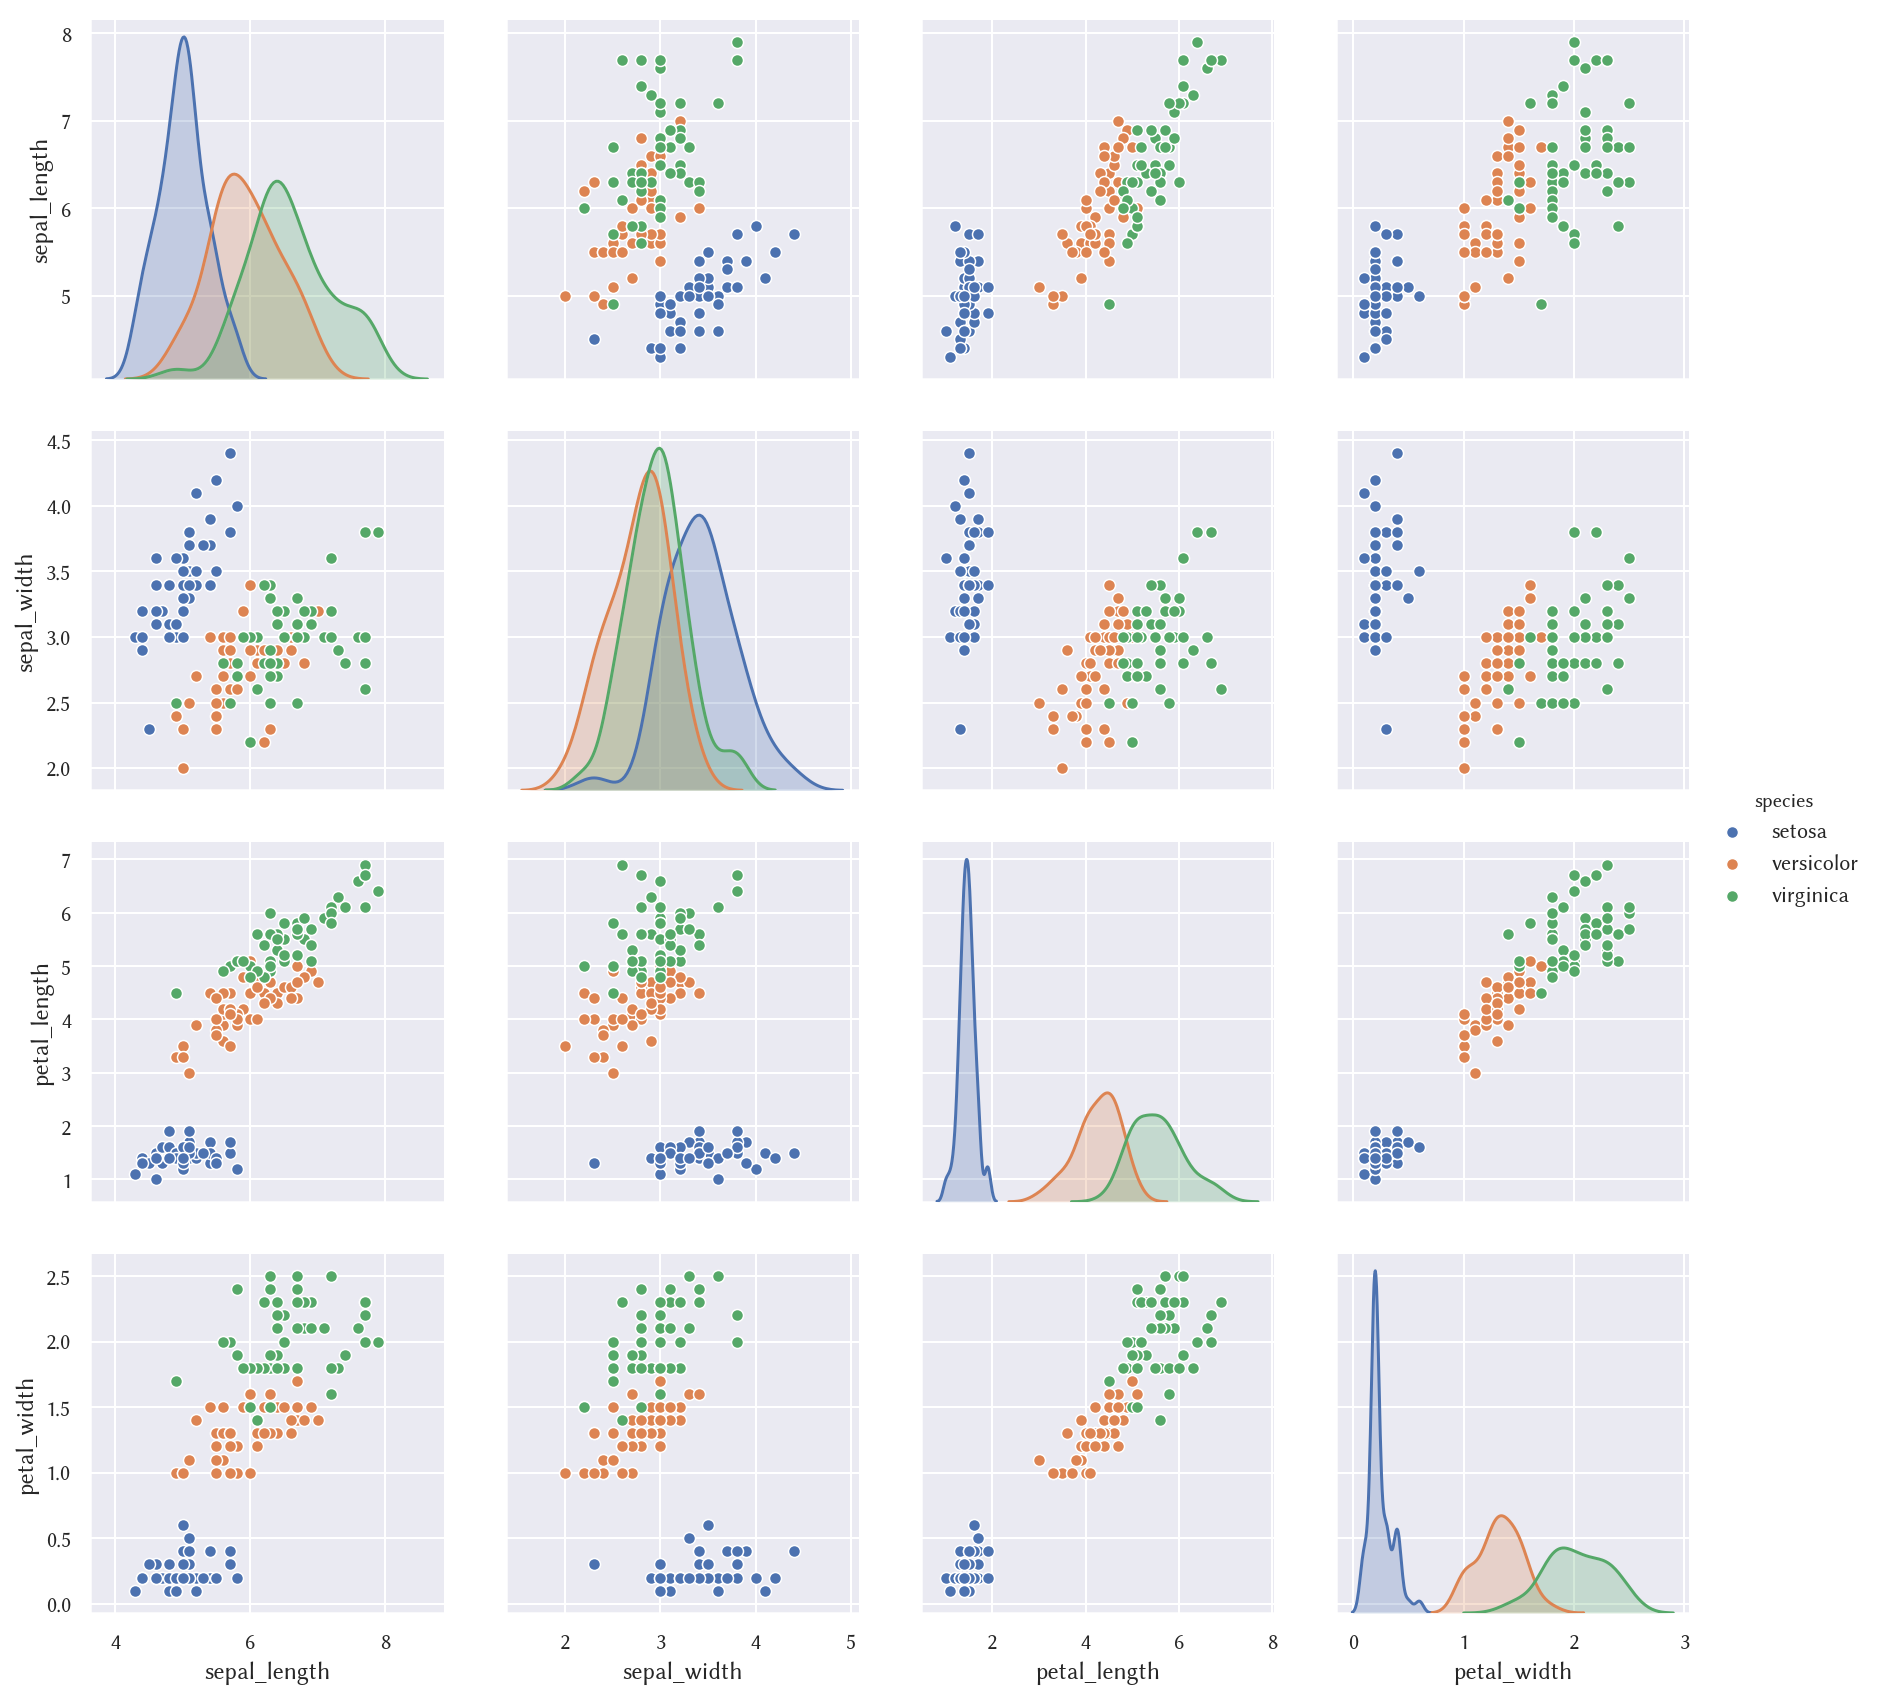

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set(font='Linux Biolinum O')
sns.pairplot(iris, hue='species', size=3);

Para usar estos datos en Scikit-Learn, separaremos el `DataFrame` en una matriz de características y un arreglo objetivo:

In [21]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [22]:
y_iris = iris['species']
y_iris.shape

(150,)

A modo de resumen, la organización de características y valores objetivos se ve como en el siguiente diagrama:

![](figures/05.02-samples-features.png)

Con los datos en un formato adecuado, podemos movernos a la siguiente etapa: la API de estimadores (_estimator_) de Scikit-Learn:

## API de Estimadores de Scikit-Learn

La API de Scikit-Learn ha sido diseñada con los siguientes principios guía en mente (ver el artículo [API de Scikit-Learn API](http://arxiv.org/abs/1309.0238)):

- *Consistencia*: Todos los objetos comparten una interfaz común diseñada a partir de un conjunto limitado de métodos, con documentación consistente.

- *Inspección*: Todos los parámetros y sus valores son expuestos como atributos públicos.

- *Jerarquía Limitada de Objetos*: Los algoritmos son representados como clases de Python; 
los datasets se representan con formatos estándar (arreglos de NumPy,`DataFrame`s de Pandas, matrices dispersas de SciPy), y los
nombres de parámetros utilizan cadenas (_strings_) estándar de Python.

- *Composición*: Existen tareas de machine learning que se pueden expresar como una secuencia de algoritmos más básicos o fundamentales,
y Scikit-Learn aprovecha esto cuando es posible.

- *Valores por Omisión Aceptables*: Cuando los modelos requieren parámetros especificados por sus usuaries, la biblioteca define un valor
por omisión adecuado para cada parámetro.

En la práctica, estos principios hacen que Scikit-Learn sea fácil de usar una vez que se han entendido sus principios básicos.
Cada algoritmo de machine learning en Scikit-Learn está implementado con la API de Estimadores, lo que provee una interfaz consistente para una 
amplia gama de aplicaciones de machine learning.

### Funcionalidad Básica de la API

Usualmente los pasos a seguir con la API de estimadores son los siguientes:

1. Elegir un modelo, importando la clase correspondiente desde la biblioteca en nuestro programa.
2. Elegir los hiperparámetros del modelo, instanciando la clase con los valores deseados.
3. Organizar los datos en matrices de características y arreglos objetivo, de acuerdo a la discusión anterior.
4. Ajustad el modelo a los datos, llamando al método `fit()` de la instancia del modelo.
5. Aplicar el modelo a datos nuevos:
   - En aprendizaje supervisado, se suelen predecir etiquetas para datos sin etiquetar utilizando el método `predict()`.
   - En aprendizaje no supervisado, se suele transformar o inferir propiredades de los datos con los métodos `transform()` o `predict()`.
   
Ahora veremos algunos ejemplos simples de aplicación de métodos supervisados y no supervisados.

### Ejemplo de Aprendizaje Supervisado: Regresión Lineal Simple

Consideremos una regresión lineal simple, es decir, el caso común de ajustar una línea a datos de la forma $(x, y)$.
Usaremos los siguientes datos para este ejemplo:

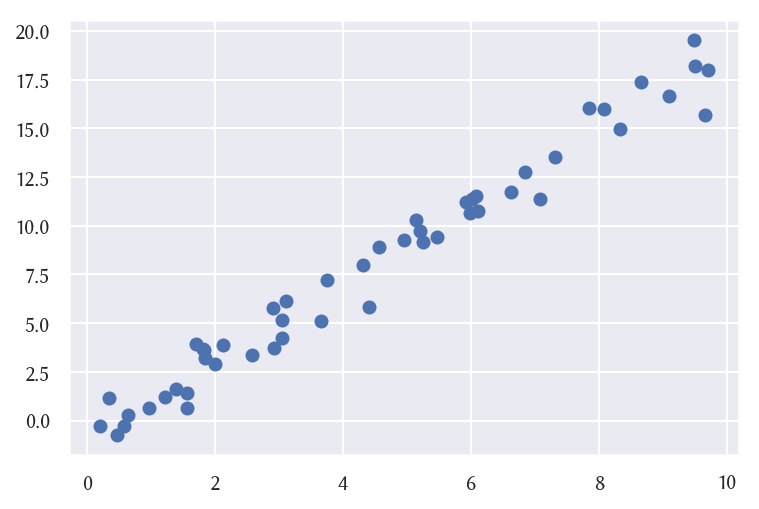

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

Como tenemos los datos organizados en características (`x`) y valores objetivos (`y`), podemos seguir la receta vista anteriormente:

#### 1. Elegir un tipo de modelo.

En Scikit-Learn, cada tipo de modelo se representa por una clase en Python.
Así, si queremos usar un modelo simple de regresión lineal, podemos importarlo de la siguiente manera:

In [8]:
from sklearn.linear_model import LinearRegression

Nota que existen otros modelos más generales de regresión lineal, puedes leer sobre ellos en la [documentación del módulo ``sklearn.linear_model``](http://scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Elegir los hiperparámetros del modelo

Es importante saber que _una clase de un modelo no es lo mismo que una instancia de éste_.

Una vez decidido el modelo que utilizaremos, y la clase que importaremos, todavía hay decisiones abiertas.
Dependiendo del modelo con el que trabajemos, podríamos necesitar responder algunas preguntas como las siguientes:

- ¿Queremos ajustar por la intersección con el eje _y_?
- ¿Queremos que el modelo sea normalizado?
- ¿Queremos preprocesar las características para que el modelo sea más flexible?
- ¿Qué nivel de regularización queremos considerar en el modelo?
- ¿Cuántas componentes tendrá este modelo?

Estas decisiones importantes se realizan _una vez que hemos decidido el tipo de modelo a utilizar_.
Nuestras respuestas se suelen representar como _hiperparámetros_ (_hyperparameters_), o parámetros que deben ser
configurados antes de que el modelo se ajuste a los datos.
En Scikit-Learn, los hiperparámetros se eligen entregando sus valores al instanciar un modelo.
En la próxima clase exploraremos cómo podemos motivar de manera cuantitativa la elección de hiperparámetros de un modelo.

En nuestro ejemplo de regresión lineal, podemos instanciar la clase `LinearRegression` y especificar que queremos ajustar considerando la intersección con el eje _y_, a través del hiperparámetro `fit intercept`:

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ten en cuenta que cuando se instancia el modelo, la única acción realizada es almacenar los valores de los hiperpárametros. 
Particularmente, no hemos aplicado el modelo aún a ningún dataset: la API de Scikit-Learn deja clara la distinción entre _elegir un modelo_ y _aplicar un modelo a un dataset_.

#### 3. Organizar los datos en características y objetivos

Previamente detallamos la representación de datos en Scikit-Learn, lo que requiere una matriz de características bidimensional y un arreglo objetivo unidimensional.

Nuestra variable objetivo `y` ya está en el formato correcto (un arreglo de tamaño `n_samples`), pero necesitaremos masajear `x` para convertirla en una matriz bidimensional de tamaño `[n_samples, n_features]`, porque actualmente es un arreglo de tamaño `n_samples`.
Afortunadamente, dicha conversión es simple a través del siguiente código:

In [12]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Ajustar el modelo a los datos

Llegó el momento de aplicar el modelo a los datos.
Esto se puede hacer con el método ``fit()`` del modelo:

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

El comando ``fit()`` causa que se computen cálculos que dependen de cada modelo, y que los resultados de dichos cómputos se almacenen en atributos específicos del modelo que el/la usuaria puede explorar.
Por convención, los parámetros que se aprendieron durante el proceso de ajuste tienen sufijos de _underscore_, por ejemplo, en esta instancia del modelo lineal se pueden inspeccionar los siguientes parámetros:

In [15]:
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311146

Estos dos parámetros representan la pendiente (_slope_) y la intersección (_intercept_) del modelo.
Comparados con la manera en la que definimos los datos, vemos que son cercanos a la pendiente de 2 y la intersección de -1.

Una duda que suele aparecer tiene relación con la incerteza de estos parámetros. ¿Cómo medirla? 
En general, Scikit-Learn no provee herramientas para deducir conclusiones sobre los parámetros internos de los modelos.
Interpretar dichos parámetros es una pregunta más afín al _modelamiento estadístico_ que a _machine learning_.
Machine learning, en cambio, se enfoca en lo que _predice_ el modelo.
Si quieres aprender más sobre el significado y la certeza de los parámetros dentro de un modelo, existen otras herramientas como el módulo de Python llamado [Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Predecir etiquetas para datos desconocidos

Una vez que el modelo fue entrenado, la principal tarea en machine learning _supervisado_ es evaluarlo de acuerdo a cómo se comporta con datos que no eran parte del dataset de entrenamiento (o ajuste).
En Scikit-Learn, esto se puede hacer con el método ``predict()``.
En este caso, los "nuevos datos" serán una matriz bidimensional de valores de _x_, y le preguntaremos al modelo cuáles son los valores _y_ predecidos.

In [17]:
xfit = np.linspace(-1, 11)

Al igual que antes, necesitamos convertir este arreglo a una matrix bidimensional, que después usaremos para predecir las nuevas etiquetas:

In [18]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, visualizemos los resultados, primero graficando los datos de entrenamiento, y luego los datos ajustados y predecidos:

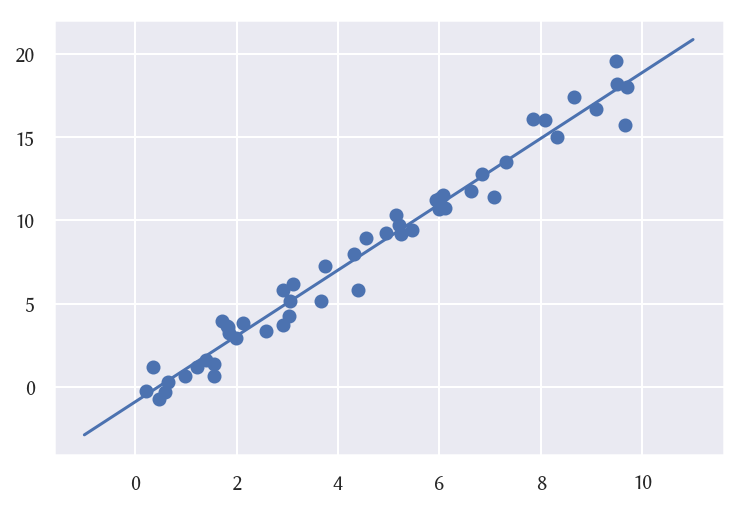

In [19]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Típicamente la eficacia de un modelo se evalúa comparando sus resultados con una base conocida, como veremos en el siguiente ejemplo.

### Ejemplo de Aprendizaje Supervisado: Clasificación de las Iris

Volvamos al ejemplo que vimos al comienzo de este notebook: las flores de Iris.
Nuestra pregunta será la siguiente: dado un modelo entrenado en una porción de los datos, ¿qué tan bien podemos predecir las especies de la porción restante?

Para esta tarea usaremos un modelo generativo simple conocido como _Gaussian Naive Bayes_, que asume que cada clase se describe por una distribución Gaussiana alineada con los ejes cartesianos. Porque es rápida y no requiere hiperparámetros, es usualmente utilizada como modelo base para la clasificación, antes de utilizar modelos más sofisticados.

Como queremos evaluar en modelo con datos que no ha visto antes, vamos a dividir el dataset en un _set de entrenamiento_ (_training set_) y un _set de prueba_ (_testing set_). 
Esto se puede hacer a mano, pero existe una función utilitaria `train_test_split` que lo puede hacer por nosotros:

In [23]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

Con los datos ordenados, podemos seguir nuestra receta para predecir las etiquetas de especie para cada flor:

In [24]:
from sklearn.naive_bayes import GaussianNB # 1. elegir clase del modelo
model = GaussianNB()                       # 2. instanciarlo
model.fit(Xtrain, ytrain)                  # 3. ajustar la instancia a los datos
y_model = model.predict(Xtest)             # 4. predecir en datos nuevos

Finalmente, podemos medir la fracción de las predicciones que acertaron a través del método ``accuracy_score``:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Con una precisión (nota que en inglés _precision_ y _accuracy_ no son necesariamente lo mismo) cercana al 97%, vemos que incluso este modelo de predicción ingenuo es preciso para este dataset particular.

### Aprendizaje No Supervisado: Dimensionalidad de las Flores de Iris

Como un ejemplo de aprendizaje no supervisado, veamos cómo reducir la dimensionalidad del dataset Iris de manera que sea más fácil de visualizar.
Recuerda que el dataset tiene cuatro dimensiones: hay cuatro características o mediciones para cada observación o muestra.

La tarea de reducción dimensional es preguntarse si es que existe una representación en menos dimensiones que mantenga las propiedades esenciales de los datos (bajo una definición específica de "propiedad esencial").
A veces la reducción dimensional es usada como ayuda en visualizar los datos: después de todo, ¡es más fácil graficar datos en dos dimensiones que en cuatro (o más)!

Aquí utilizaremos una técnica conocida como _Análisis de Componentes Principales_ (_Principal Component Analysis_, PCA), que veremos en una clase próxima. Es una técnica lineal rápida de reducción dimensional.
Le pediremos al modelo que nos entregue dos componentes, es decir, que entregue una representación bidimensional de los datos.

De acuerdo a la secuencia de pasos descrita antes, tenemos el siguiente código:

In [28]:
from sklearn.decomposition import PCA  # 1. Elegir la clase de modelo
model = PCA(n_components=2)            # 2. Instanciar el modelo con hiperparámetros
model.fit(X_iris)                      # 3. Ajustar a los datos. ¡Nota que no se especifica y!
X_2D = model.transform(X_iris)         # 4. Transformar los datos a dos dimensiones

Ahora grafiquemos los resultados. Una manera rápida de hacerlo es insertando los resultados en el ``DataFrame`` de Iris que teníamos originalmente, y usar el método ``lmplot`` de Seaborn para graficar:

/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


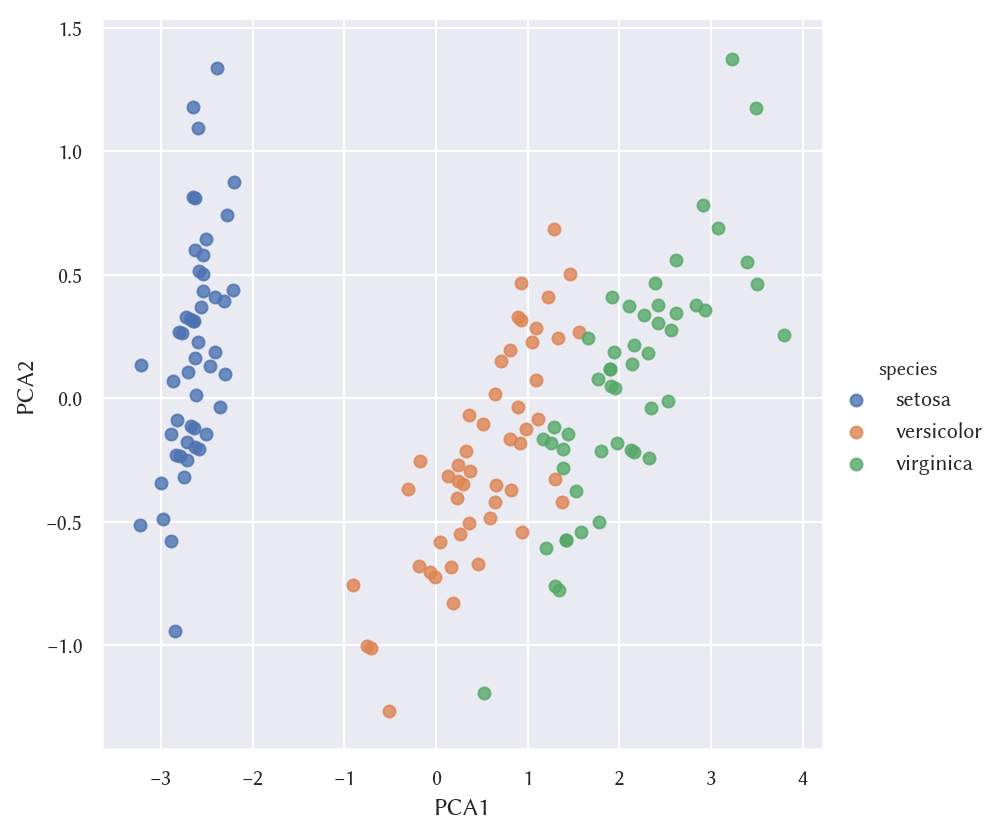

In [30]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, size=6, fit_reg=False);

Vemos que en esta representación bidimensional las especies están suficientemente separadas, a pesar de que el algoritmo PCA no tenía conocimiento sobre éstas.
Esto nos dice que una manera directa de clasificar los datos probablemente funcionará bien, como vimos con anterioridad.

### Aprendizaje No Supervisado: Agrupación de las Flores de Iris

Como siguiente ejercicio haremos agrupación (_clustering_) del dataset Iris.
Un algoritmo de clustering intenta identificar distintos grupos en los datos, sin referencia a ningún tipo de etiquetado.
Usaremos un método poderoso de clustering llamado _Gaussian Mixture Model_ (GMM), que discutiremos en una clase futura.
Un GMM intenta modelar los datos como una colección de masas gaussianas.

Podemos ajustar el GMM como sigue:

In [26]:
from sklearn.mixture import GMM      # 1. Importar la clase del modelo
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instanciar el modelo con hiperparámetros
model.fit(X_iris)                    # 3. Ajustar los datos. ¡Nota que y no se utiliza!
y_gmm = model.predict(X_iris)        # 4. Inferir grupos (o etiquetas) de los datos.

/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/egraells/.virtualenvs/jupyter/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/egraells/.virtualenvs/jupyter/

Agregaremos la etiqueta del _cluster_ o grupo inferido al `DataFrame` Iris, y usaremos Seaborn para visualizar los resultados:

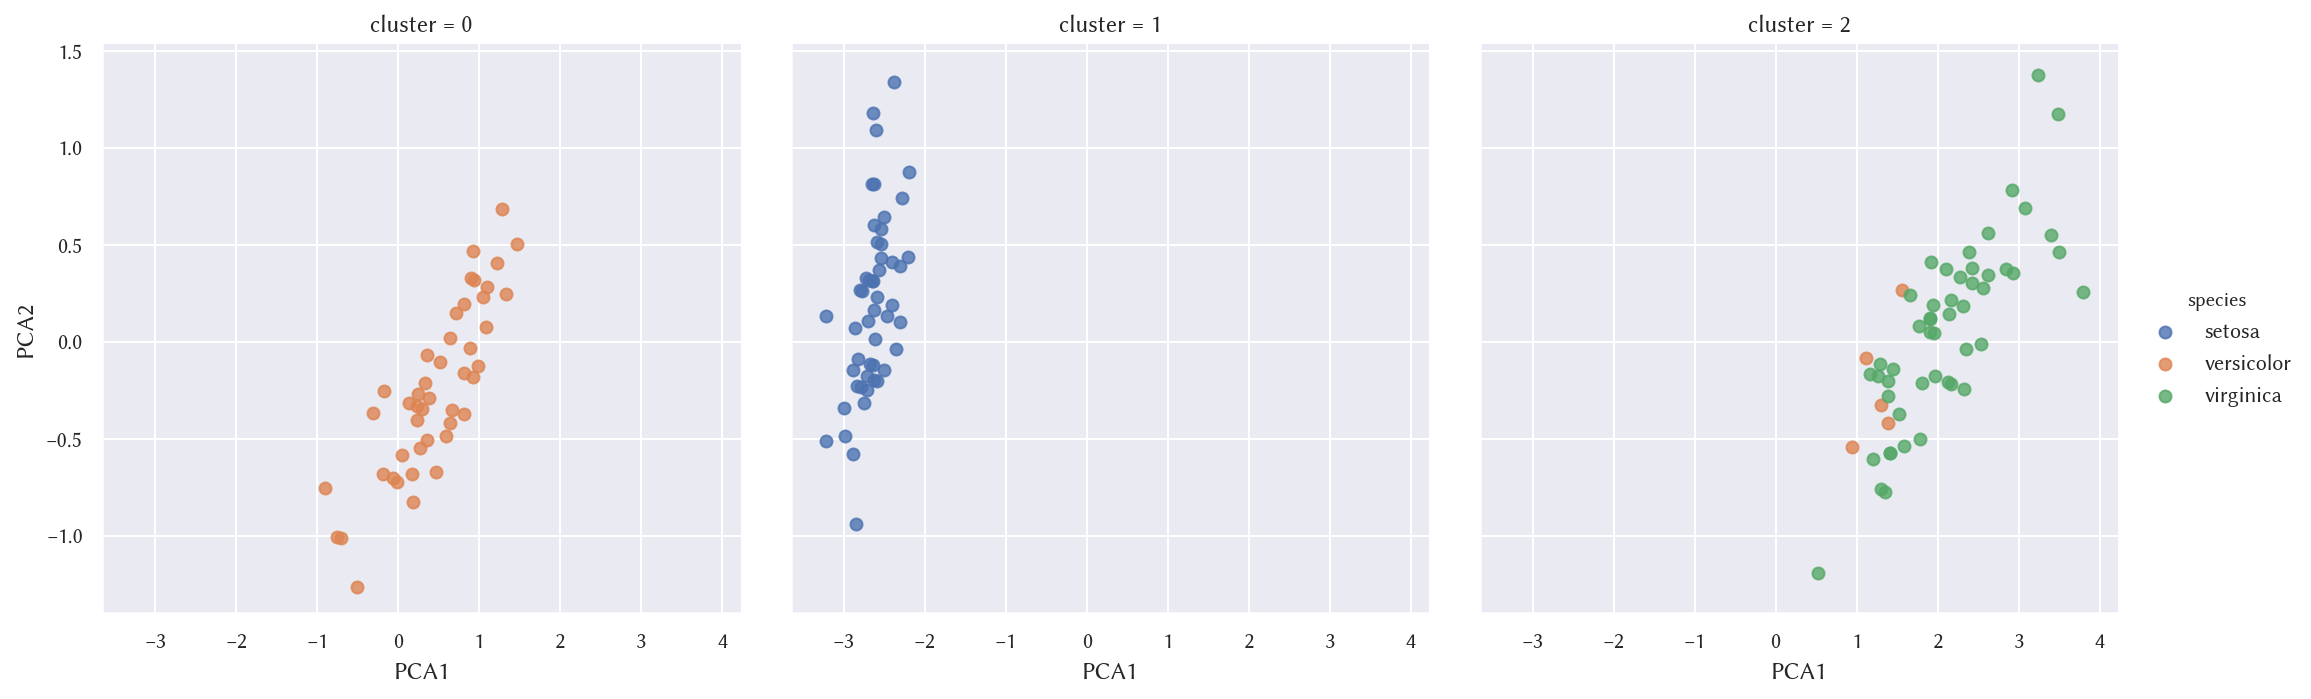

In [31]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

Al graficar el dataset en partes, de acuerdo al número de clúster asignado, podemos ver qué tan bien el algoritmo GMM ha recuperado perfectamente la especie _setosa_, mientras que existe un pequeño error en el ajuste que mezcla las especies _versicolor_ y _virginica_.
Esto significa que incluso sin que una persona experta nos indique las especies de cada flor, las mediciones de éstas son lo suficientemente distintas que podemos _automáticamente_ identificar la presencia de estos grupos con un algoritmo de clustering.

Algoritmos de este tipo pueden informar el conocimiento experto, por ejemplo, dando pistas respecto a las relaciones entre las muestras que se están observando.

## Aplicación: Exploración de Dígitos Escritos a Mano

Para demostrar estos principios en un problema más interesante, consideremos una pieza del problema de reconocimiento óptico de carácteres: la identificación de dígitos escritos a mano.
En entornos no controlados este problema se relaciona tanto con ubicar como con identificar carácteres en una imagen. 
Aquí tomaremos un atajo y usaremos el dataset de dígitos pre-formateados, que viene incluído con la biblioteca, y donde los dígitos ya están ubicados.

### Cargando y Visualizando los Dígitos

Usaremos la interfaz de acceso a datos de Scikit-Learn para cargar este dataset:

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

El dataset es un arreglo tridimensional: tiene 1.797 muestras, cada una consistente en una grilla de 8 $\times$ 8 píxeles.
Veamos los primeros cien elementos:

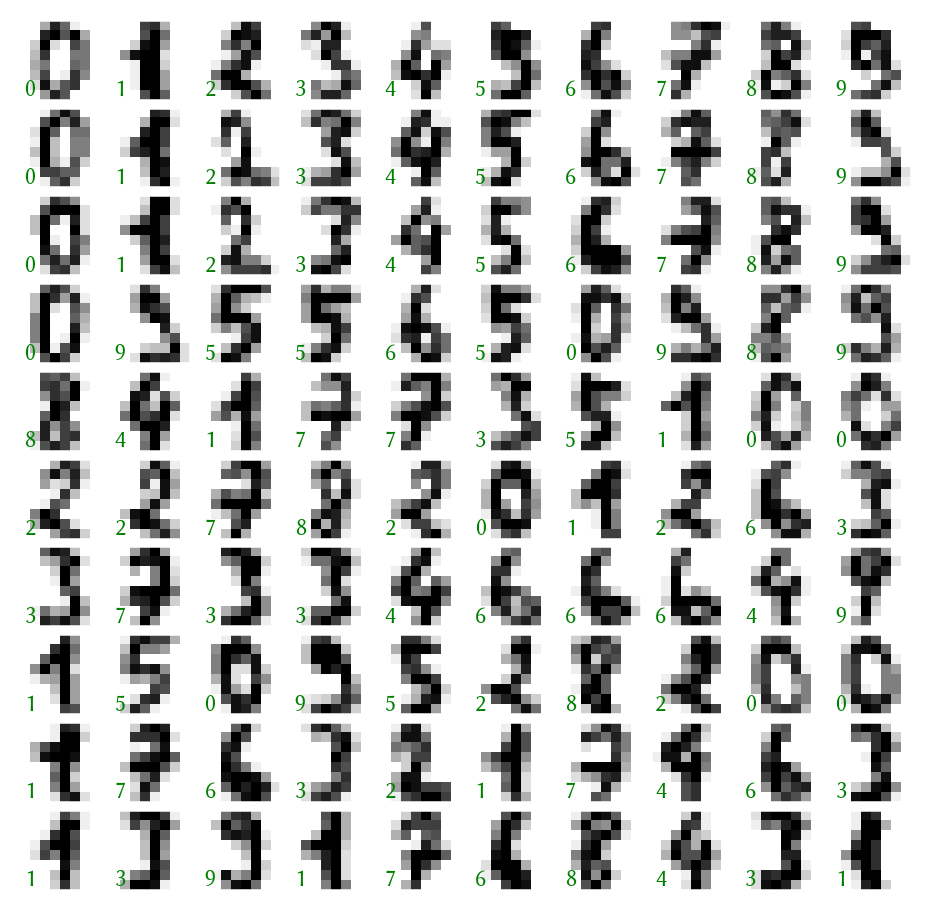

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Para trabajar con estos datos necesitamos una matriz bidimensional de tamaño ``[n_samples, n_features]``.
Podemos lograr esto tratando cada píxel en la imagen como una característica: es decir, aplanaremos los arreglos de píxeles de modo que tengamos un arreglo de 64 píxeles para representar cada dígito.
Adicionalmente, necesitamos el arreglo objetivo, que ya está definido como la etiqueta de cada dígito.
Estas dos cantidades están construidas en el dataset en los atributos ``data`` y ``target``, respectivamente:

In [67]:
X = digits.data
X.shape

(1797, 64)

In [68]:
y = digits.target
y.shape

(1797,)

Vemos que hay 1,797 muestras y 64 características.

### Aprendizaje No Supervisado: Reducción Dimensional

Quisiéramos visualizar nuestros datos dentro del espacio de 64 dimensiones, pero es difícil hacerlo de manera efectiva.
En vez de eso, reduciremos las dimensiones a dos utilizando un método no supervisado.
Para ello utilizamos un aprendizaje de _variedad_ (_manifold_, en inglés - la generalización de curvas y superficies a más dimensiones, y en cualquier cuerpo matemático, no solamente los números reales). El algoritmo a utilizar se llama _Isomap_ y lo veremos en más detalle más adelante.

Aplíquemoslo así:

In [69]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

Como resultado, vemos que los datos proyectados son bidimensionales. 
Grafiquemos lo que obtuvimos para ver si hay alguna estructura aparente:

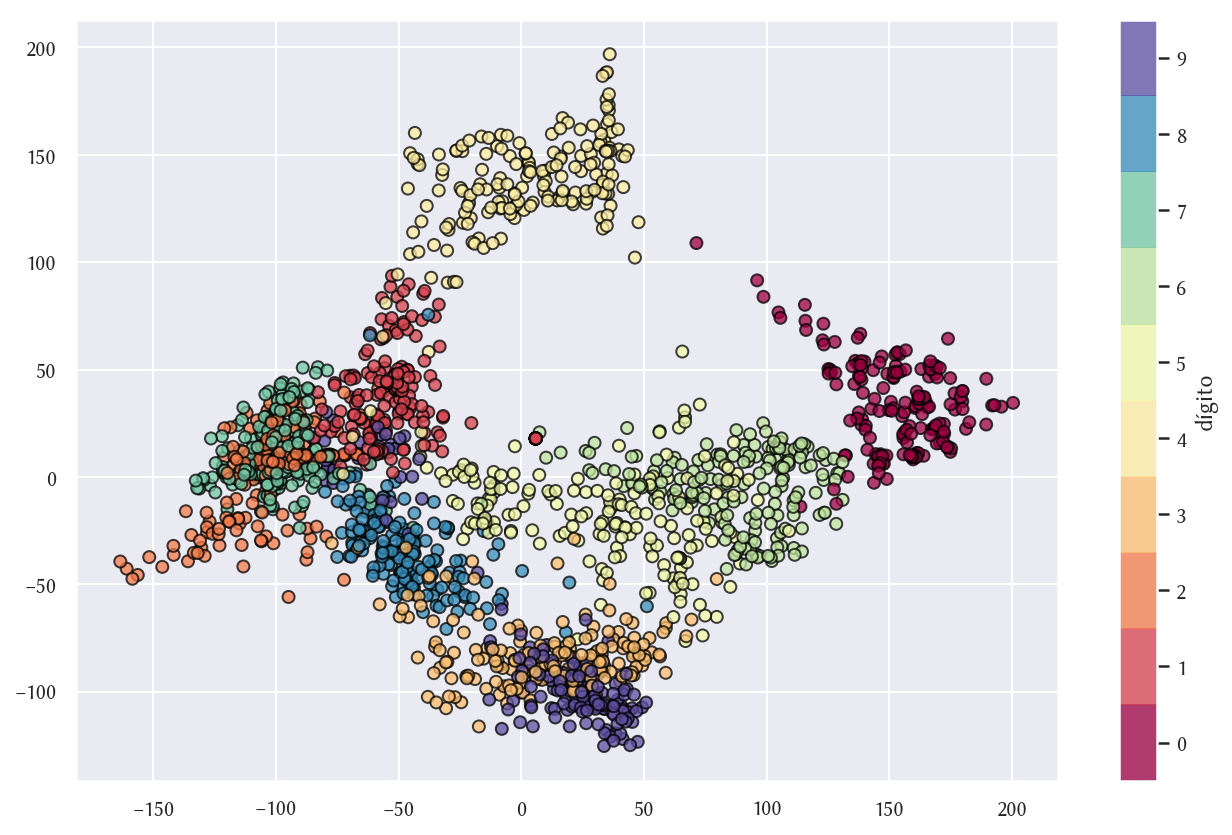

In [70]:
plt.figure(figsize=(11,7))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='black', alpha=0.75,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='dígito', ticks=range(10))
plt.clim(-0.5, 9.5);

Este gráfico nos muestra qué tanto se separan los números entre sí de acuerdo a su representación en el espacio de 64 dimensiones.
Por ejemplo, los ceros y los unos tienen poca (si es que) intersección en este espacio paramétrico.
Intuitivamente, esto hace sentido: la representación gráfica de un cero está vacía en el miedo, mientras que un uno generalmente está pintado en el medio y el exterior está vacío.
Por otro lado, pareciera haber un espectro más o menos continuo entre unos y cuatros: podemos interpretar que se debe a que algunas personas dibujan los unos con "sombreros" sobre ellos, que los hace similares a los cuatros.
This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.

En general, los diferentes grupos parecen estar suficientemente separados en el espacio paramétrico: esto nos indica que incluso un algoritmo directo de clasificación supervisada debería comportarse bien en este escenario.

¡Problemos!

### Clasificación en los Dígitos

Aplicaremos un algoritmo de clasificación a los dígitos.
Como hicimos con las flores de Iris, separaremos el dataset en _training_ y _testing_, y ajustaremos un modelo Gaussan Naive Bayes:

In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Ahora que hemos ajustado con el set de entreneamiento y predecido para el set de prueba, podemos calcular la precisión del modelo instanciado:

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

¡Con este modelo tan simple logramos clasificar con 80% de precisión a cada dígito!
Sin embargo, este número no nos dice _dónde_ nos hemos equivocado.
Una buena manera de explorar eso es a través de una _matriz de confusión_ (_confusion matrix_), que podemos estimar en Scikit-Learn y graficar con Seaborn:

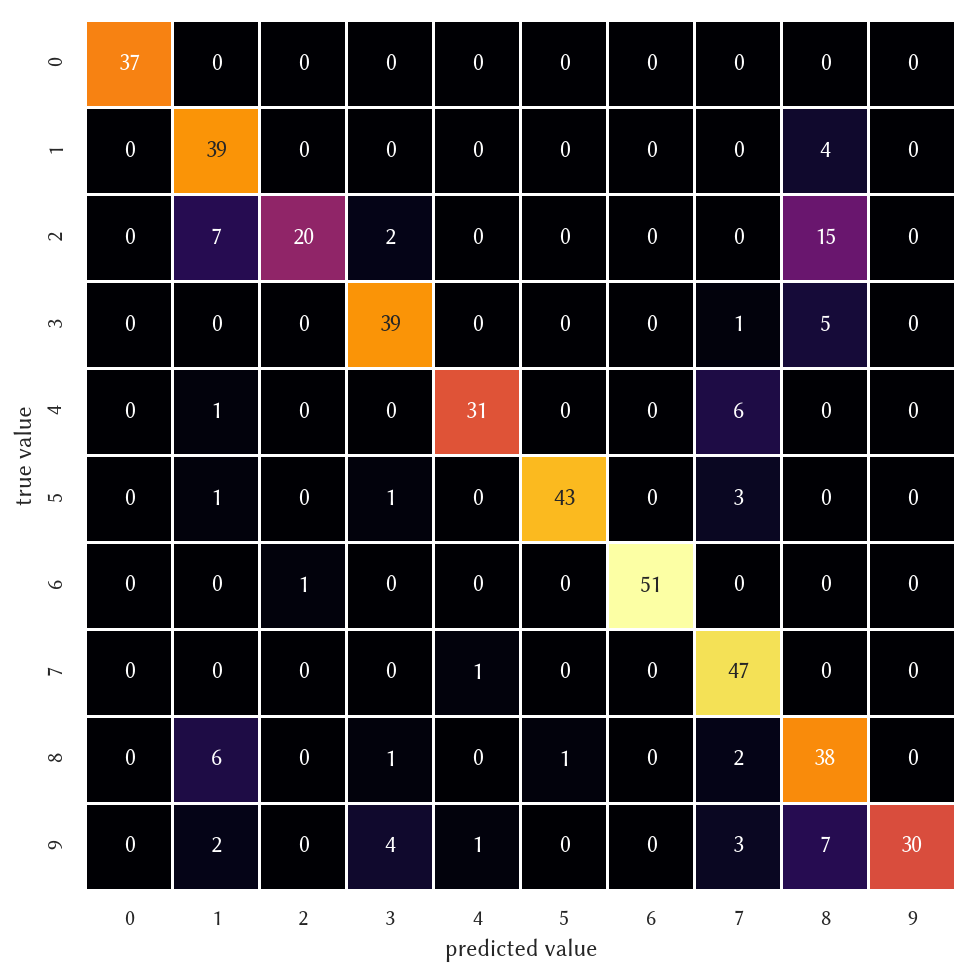

In [81]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True, cbar=False, linewidth=1, cmap='inferno')
plt.xlabel('predicted value')
plt.ylabel('true value');

Esta matriz nos muestra dóńde se ubican las observaciones para las que falló la predicción.
Por ejemplo, un gran número de dígitos 2 son mal clasificados como 8.

Otra manera de entender lo que hace el modelo es graficar las observaciones de nuevo, esta vez con las etiquetas de predicción.
Usaremos verde para etiquetas correctas, y rojas para etiquetas incorrectas:

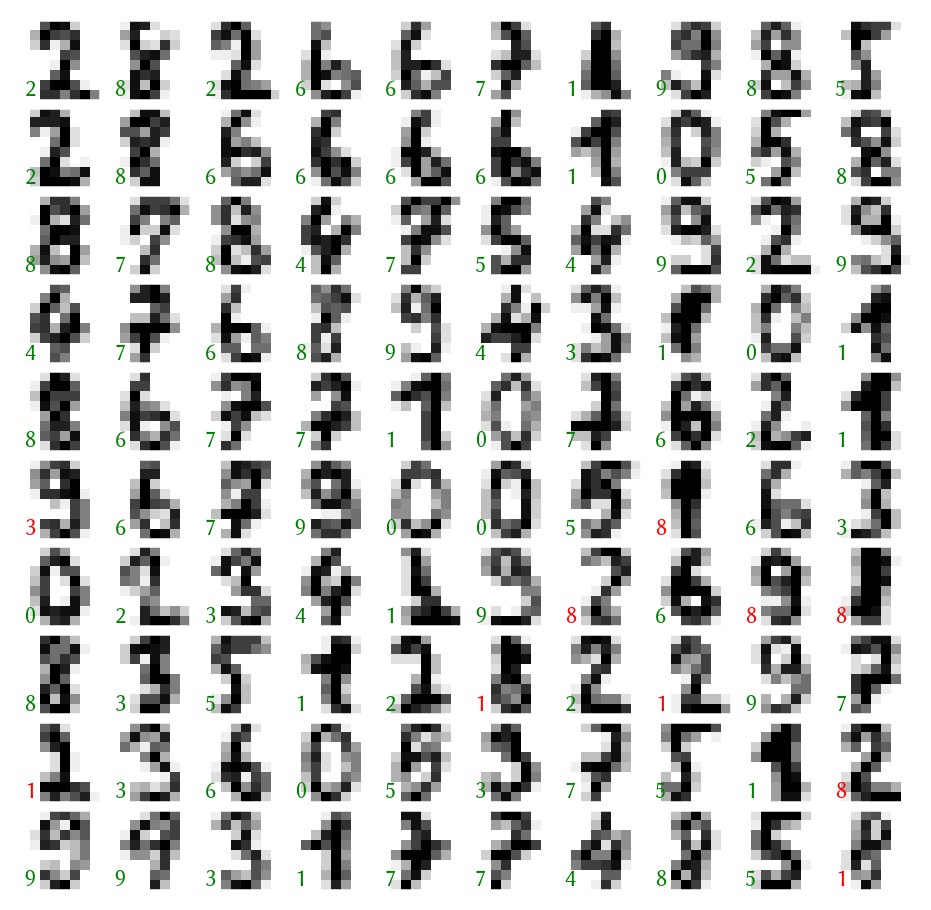

In [82]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Al examinar este subconjunto de los datos, podemos aprender los patrones detrás de los errores de clasificación del algoritmo. 
Para poder ir más allá del 80% de precisión en la clasificación podríamos movernos a algoritmos más sofisticados, como Support Vector Machines, Random Forests, u otros. Dichos algoritmos los veremos en futuras clases.

## Resumen

En este notebook hemos cubierto las características esenciales de Scikit-Learn: representación de datos y la API de estimadores.
Independiente del tipo de estimador a utilizar, siempre se usa el mismo patrón: importar/instanciar/ajustar/predecir.
Sabiendo esto sobre la API de estimación, como tarea para la próxima clase queda explorar la documentación de Scikit-Learn y probar diferentes modelos en tus propios datos. Espero que me envíen los resultados de su exploración por correo electrónico.

En la próxima clase exploraremos algo que es, posiblemente, el tema máś importante en machine learning: colo elegir y validar tu modelo. ¡Nos vemos!

## Créditos

![](figures/PDSH-cover-small.png)

Este notebook contiene un extracto del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) por Jake VanderPlas; el contenido también está disponible en [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).

El texto se distribuye bajo una licencia [CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), y el código se distribuye bajo la licencia [MIT](https://opensource.org/licenses/MIT). Si te parece que este contenido es útil, por favor considera apoyar el trabajo [comprando el libro](http://shop.oreilly.com/product/0636920034919.do).

Traducción al castellano por [Eduardo Graells-Garrido](http://datagramas.cl), liberada bajo las mismas condiciones.